In [34]:
import pandas as pd
#import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
#import seaborn as sns
import ExtractData

In [3]:
# Se definen las variables a revisar
InitialYear = 2020
EndYear = 2023
indicadores = ['uf', 'dolar', 'euro', 'ipc', 'tasa_desempleo']

df_indicadores = pd.DataFrame()
# Se crea un recorrido por todos los indicadores a analizar
for i in indicadores:
    df = ExtractData.ExtractData(i, InitialYear, EndYear)
    df['indicador'] = i
    df_indicadores = pd.concat([df_indicadores, df], ignore_index=True)

#Limpieza de df
df_indicadores['fecha'] = pd.to_datetime(df_indicadores['fecha'])

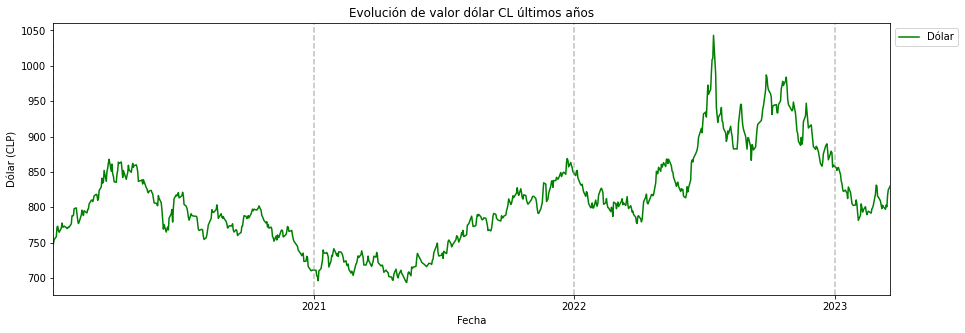

In [50]:
df_dolar = df_indicadores[df_indicadores['indicador'] == 'dolar']
df_dolar = df_dolar.sort_values(by='fecha')
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_dolar['fecha'], df_dolar['valor'], '-', label='Dólar', color='green')

#Título
ax.set_title('Evolución de valor dólar CL últimos años')
# Etiquetas
ax.set_xlabel('Fecha')
date_range = pd.date_range(start=df_dolar['fecha'].min(), end=df_dolar['fecha'].max(), freq='YS')
ax.set_xticks(date_range)
ax.set_xticklabels(date_range.year)
ax.set_ylabel('Dólar (CLP)')

# Se agregan líneas verticales en cada primero de enero para dividirlos por año
for year in range(df_dolar['fecha'].dt.year.min(), df_dolar['fecha'].dt.year.max()+1):
    ax.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--', color='gray', alpha=0.5)

#leyendas
ax.legend(['Dólar'], bbox_to_anchor=(1.0, 1), loc='upper left')
ax.set_xlim(df_dolar['fecha'].min(), df_dolar['fecha'].max())

# Mostrar el gráfico
plt.show()